In [1]:
import ema as em
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

In [2]:
U = np.array([-10.3497, -13.4961, 0.1565, 4.116])*1e-3

In [3]:
mdl = em.Model(2,3)
n = mdl.dnodes
e = mdl.delems
mdl.material('default', E=1000)
mdl.xsection('default', 1e8, 50)
xt = mdl.xsection('truss', 20, 1)

mdl.node('1',  0.0, 0.0)
mdl.node('2',  8.0, 0.0)
mdl.node('3', 16.0, 0.0)
mdl.node('4', 16.0,-4.0)
mdl.node('5',  0.0, 6.0)

mdl.beam('a', n['1'], n['2'])
mdl.beam('b', n['2'], n['3'])
mdl.beam('c', n['3'], n['4'])
mdl.truss('d', n['5'], n['2'], xsec=xt)

mdl.fix(n['1'], ['y'])
mdl.fix(n['4'], ['x','y', 'rz'])
mdl.fix(n['5'], ['x','y', 'rz'])

mdl.numDOF()
em.analysis.characterize(mdl)

(0, 2)

In [4]:
e['a'].w['y'] = -10
e['b'].w['y'] = -10
e['d'].q0['1'] = 30
Uf = em.analysis.SolveDispl(mdl)
Uf

,$U_{{fffff}}$
$1$,-3.396351e-02
$2$,-1.732141e-02
$3$,-3.396351e-02
$4$,-7.877998e-02
$5$,8.336526e-04
$6$,-3.396351e-02
$7$,-2.513980e-09
$8$,1.398679e-02


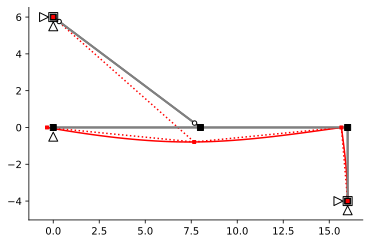

In [5]:
fig, ax = plt.subplots()
em.plot_U(mdl, Uf, ax, scale=10)

In [6]:
e['a'].E*e['a'].I

50000